**Import the required libraries**

In [669]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

--------------------------

Read the data from the input csv file

In [670]:
day = pd.read_csv('day.csv')
#day.set_index('instant',inplace=True)
day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


-------------------------------

Check the information of the dataset which includes the number of columns in the dataset and type of columns

In [671]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


--------------------

Check if any duplicate rows present in the given dataset

In [672]:
day.duplicated().sum()

0

In [673]:
print('\033[1m','\033[91m','There are',day.duplicated().sum(),'\033[91m','duplicate values in the dateset.''\033[1m') 

  There are 0  duplicate values in the dateset.


Check if any null column values present in the dataset

In [674]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

------------------------

Describe the dataset

In [675]:
day.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


We can set the instant as the index as it's a unique identifier

In [676]:
#day.set_index('instant',inplace=True)
day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


-------------------

Columns such as dteday, yr, mnth seems redundant and therefore, dropping 'yr' and 'mnth'\

In [677]:
day.drop(["yr","mnth"], axis=1, inplace=True)
day.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


---------------------------------

We already have workingday column which can explain whether it is holiday or workingday therefore, dropping 'holiday'

In [678]:
day.drop(["holiday"], axis=1, inplace=True)
day.head()

,instant,dteday,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


--------------------------------

### Will Extract month and year from dteday column

In [679]:
day['month'] = pd.to_datetime(day['dteday']).dt.month_name()
day['year'] = pd.to_datetime(day['dteday']).dt.year

<ipython-input-679-d8add332f99d>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  day['month'] = pd.to_datetime(day['dteday']).dt.month_name()
<ipython-input-679-d8add332f99d>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  day['year'] = pd.to_datetime(day['dteday']).dt.year


In [680]:
day.drop(["dteday"], axis=1, inplace=True)
day.head()

,instant,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year
0,1,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,January,2018
1,2,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,February,2018
2,3,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,March,2018
3,4,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,April,2018
4,5,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,May,2018


In [681]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   casual      730 non-null    int64  
 10  registered  730 non-null    int64  
 11  cnt         730 non-null    int64  
 12  month       730 non-null    object 
 13  year        730 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.0+ KB


-------------------------------

Lets convert these column data types

In [682]:
day["weekday"]=day.weekday.astype("category")
day["season"]=day.season.astype("category")
day["weathersit"]=day.weathersit.astype("category")

In [683]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   season      730 non-null    category
 2   weekday     730 non-null    category
 3   workingday  730 non-null    int64   
 4   weathersit  730 non-null    category
 5   temp        730 non-null    float64 
 6   atemp       730 non-null    float64 
 7   hum         730 non-null    float64 
 8   windspeed   730 non-null    float64 
 9   casual      730 non-null    int64   
 10  registered  730 non-null    int64   
 11  cnt         730 non-null    int64   
 12  month       730 non-null    object  
 13  year        730 non-null    int64   
dtypes: category(3), float64(4), int64(6), object(1)
memory usage: 65.7+ KB


In [684]:
# Will need mapping of the seasons, weekday & weathersit columns as below for better understanding the relation
day.season=day.season.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
day.weekday=day.weekday.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
day.weathersit=day.weathersit.map({1:"Clear",2:"Mist",3:"Light Snow",4:"Rainfall"})

In [685]:
print('There are ',day.shape[0],'rows and ',day.shape[1],'columns in the dataset.')

There are  730 rows and  14 columns in the dataset.


In [686]:
print('The Standard Deviation of Profit is', day['cnt'].describe().std(),
      '\n''And the Mean of Profit is',day['cnt'].describe().mean())

The Standard Deviation of Profit is 2863.2942861331426 
And the Mean of Profit is 3699.283562084541


In [687]:
day.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [688]:
day.head(10)

,instant,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,month,year
0,1,Spring,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,January,2018
1,2,Spring,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,February,2018
2,3,Spring,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,March,2018
3,4,Spring,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,April,2018
4,5,Spring,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,May,2018
5,6,Spring,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606,June,2018
6,7,Spring,Sunday,0,Mist,8.057402,10.44195,49.8696,11.304642,148,1362,1510,July,2018
7,8,Spring,Monday,1,Mist,6.765000,8.11270,53.5833,17.875868,68,891,959,August,2018
8,9,Spring,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822,September,2018
9,10,Spring,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321,October,2018


---------------------------------

# EDA

In [689]:
day.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-689-fdfabe262dbd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day.corr().style.background_gradient(cmap='coolwarm')


,instant,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year
instant,1.000000,-0.015171,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896,0.866026
workingday,-0.015171,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640,-0.011852
temp,0.150738,0.002044,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,0.048789
atemp,0.152773,0.010657,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,0.047215
humidity,0.016080,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543,-0.112547
windspeed,-0.112667,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132,-0.011624
casual,0.275604,-0.090369,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123,0.250502
registered,0.660544,0.005466,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411,0.596911
count,0.629896,-0.027640,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000,0.569728
year,0.866026,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728,1.000000


<ipython-input-690-d647e3ad8342>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(day.corr(),annot=True,cmap='Blues')


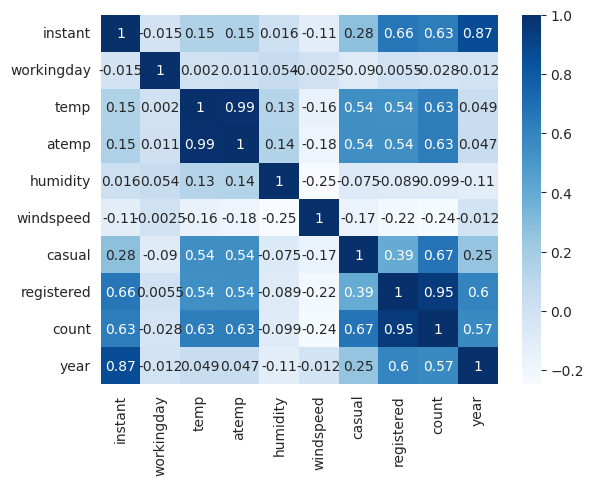

In [690]:
sns.heatmap(day.corr(),annot=True,cmap='Blues')
plt.show()

**We can see that there is high positive corralation between count of bike rentals and the registered customers. And there is a negetive correlation between count of bike rentals and humadity, windspeed and workingday columns**

-------------------------------

**Visualisation**

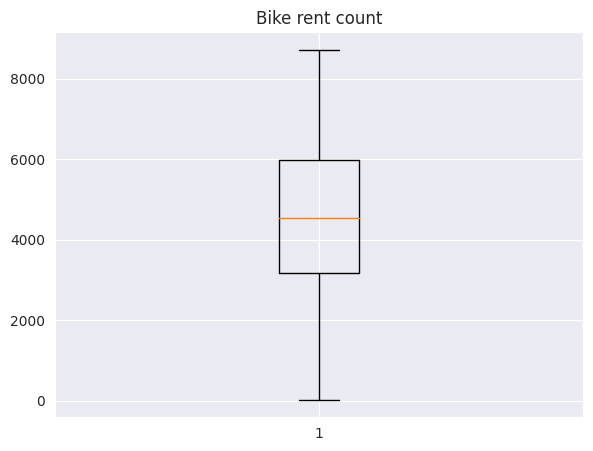

In [691]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(day['count'])
plt.title("Bike rent count")
plt.show()

<ipython-input-692-1fa2fefeaaf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day['count'])


<Axes: xlabel='count', ylabel='Density'>

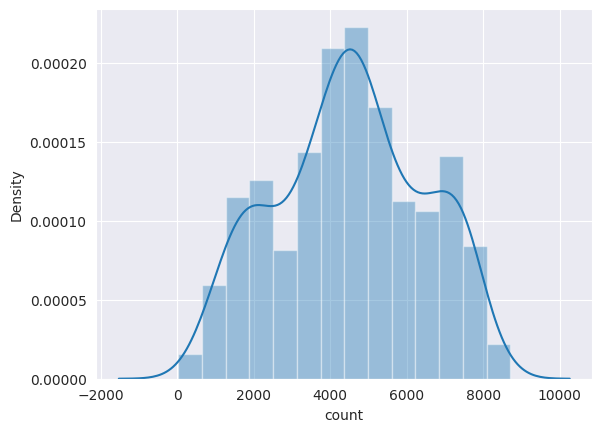

In [692]:
sns.distplot(day['count'])

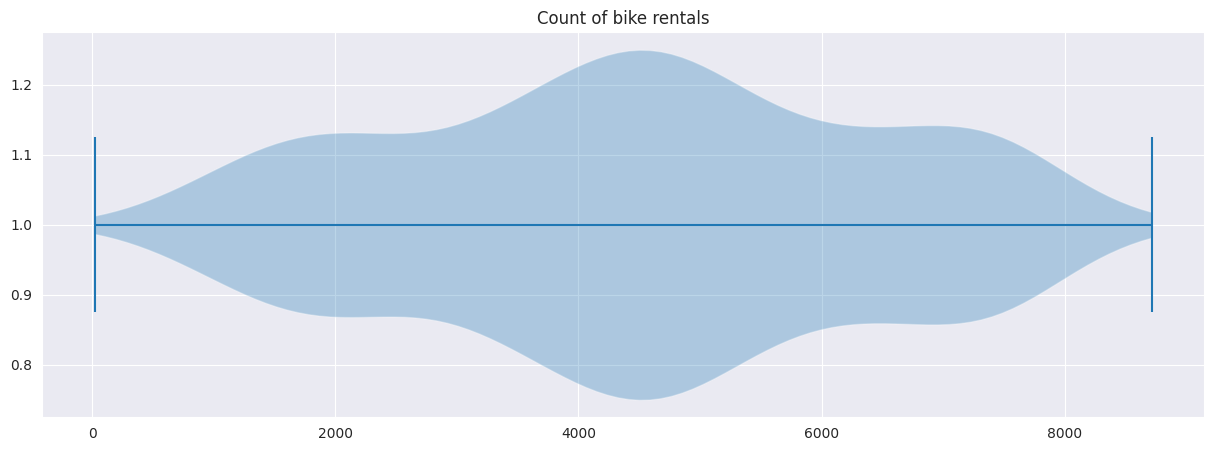

In [693]:
plt.figure(figsize=(15,5))
plt.violinplot(day['count'],vert=False)
plt.title("Count of bike rentals")
plt.show()

**Looking at the above three diagrams, we can see the 'count' data distributes almost symetrically with no outliers.**

--------------------------------

<ipython-input-694-19b65487ffd8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day.groupby('month').sum().sort_values('count', ascending= True)[['count']].plot.bar()


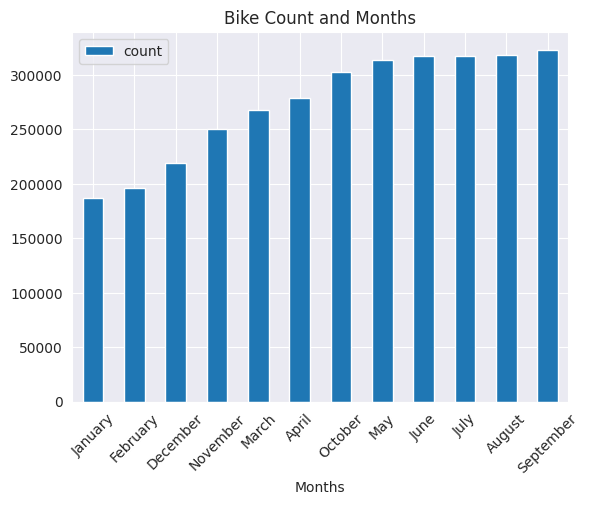

In [694]:
day.groupby('month').sum().sort_values('count', ascending= True)[['count']].plot.bar()
plt.title('Bike Count and Months')
plt.xlabel('Months')
plt.xticks(rotation = 45)
plt.show()

**Could see there are more bike rentals booked in these months September, August, July, June and May**

-----------------------------

<ipython-input-695-654d665f73ce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day.groupby('weekday').sum().sort_values('count', ascending= True)[['count']].plot.bar()


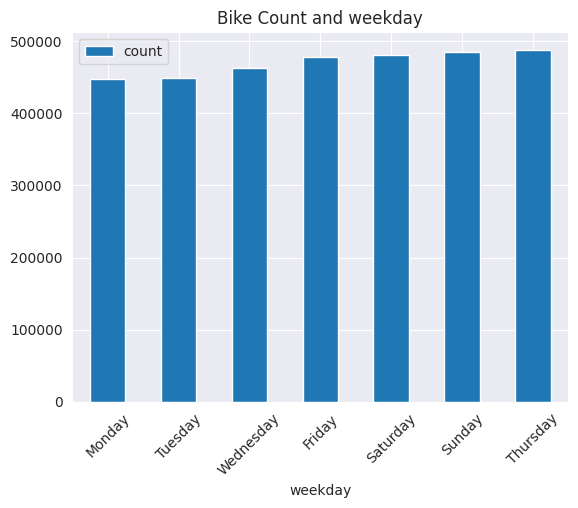

In [695]:
day.groupby('weekday').sum().sort_values('count', ascending= True)[['count']].plot.bar()
plt.title('Bike Count and weekday')
plt.xlabel('weekday')
plt.xticks(rotation = 45)
plt.show()

**weekdays have no significant impact, but if we closely observe, biking is preferred on Thursday, Friday, Saturday and Sundays**

-------------------------------------

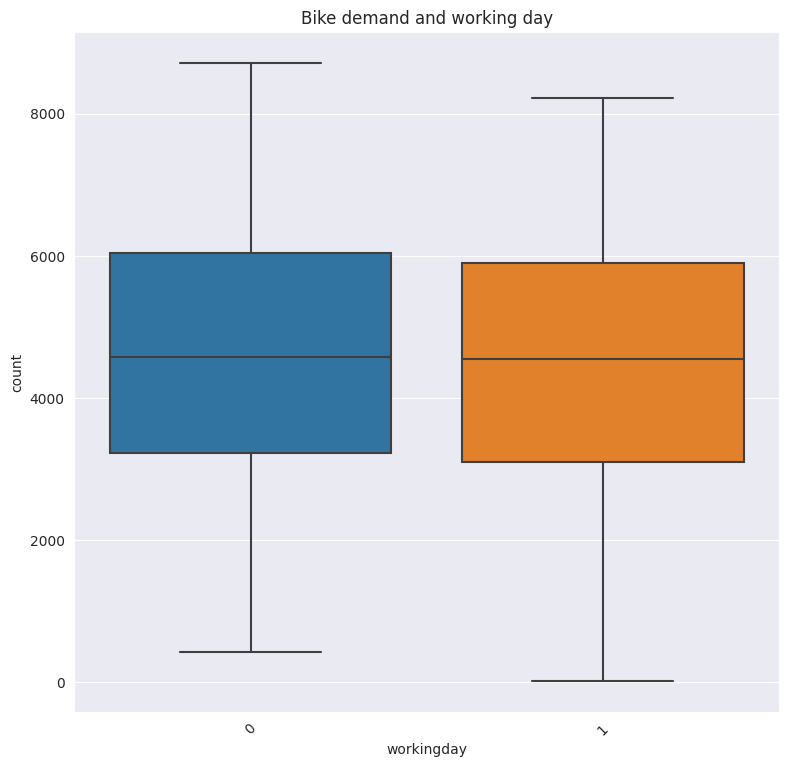

In [696]:
plt.figure(figsize=(20, 30))
plt.subplot(3,2,1)
sns.boxplot(x = 'workingday', y = 'count', data = day).set_title('Bike demand and working day')
plt.xticks(rotation = 45)
plt.show()

**Based on the above, can say there is more demand for bike rentals on holidays than on workingdays**

----------------------------

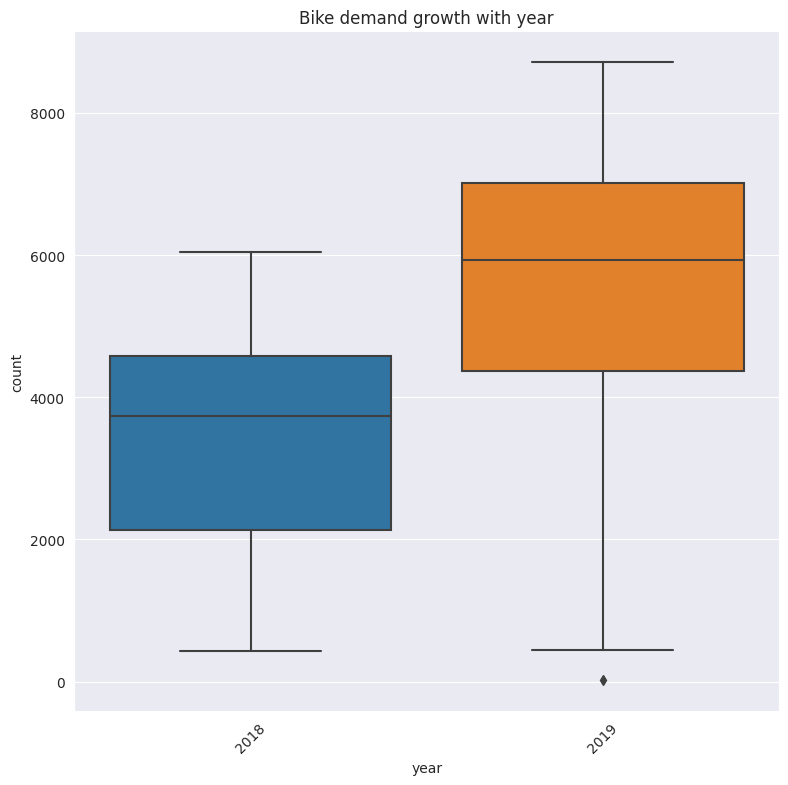

In [697]:
plt.figure(figsize=(20, 30))
plt.subplot(3,2,1)
sns.boxplot(x = 'year', y = 'count', data = day).set_title('Bike demand growth with year')
plt.xticks(rotation = 45)
plt.show()

**Based on the above, can say there is more demand for bike rentals in 2019 year than in 2018 year**

----------------------------

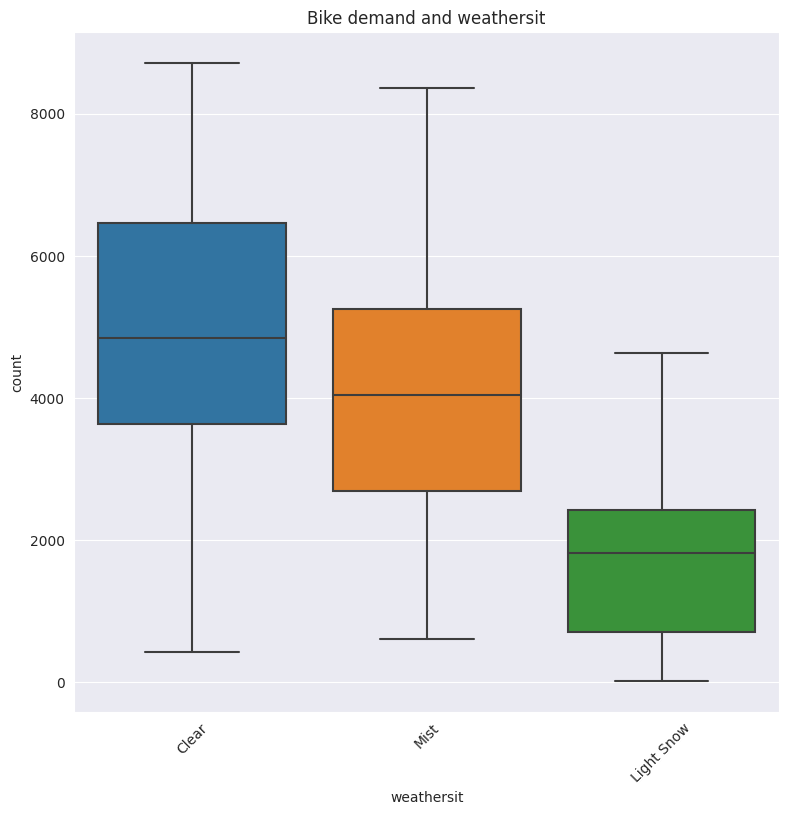

In [698]:
plt.figure(figsize=(20, 30))
plt.subplot(3,2,1)
sns.boxplot(x = 'weathersit', y = 'count', data = day).set_title('Bike demand and weathersit')
plt.xticks(rotation = 45)
plt.show()

**There is a high demand in the bike rentals when weather condition is clear than when it is mist/light snow**

---------------------------------------

**Multivariate Analysis**

<Figure size 640x480 with 0 Axes>

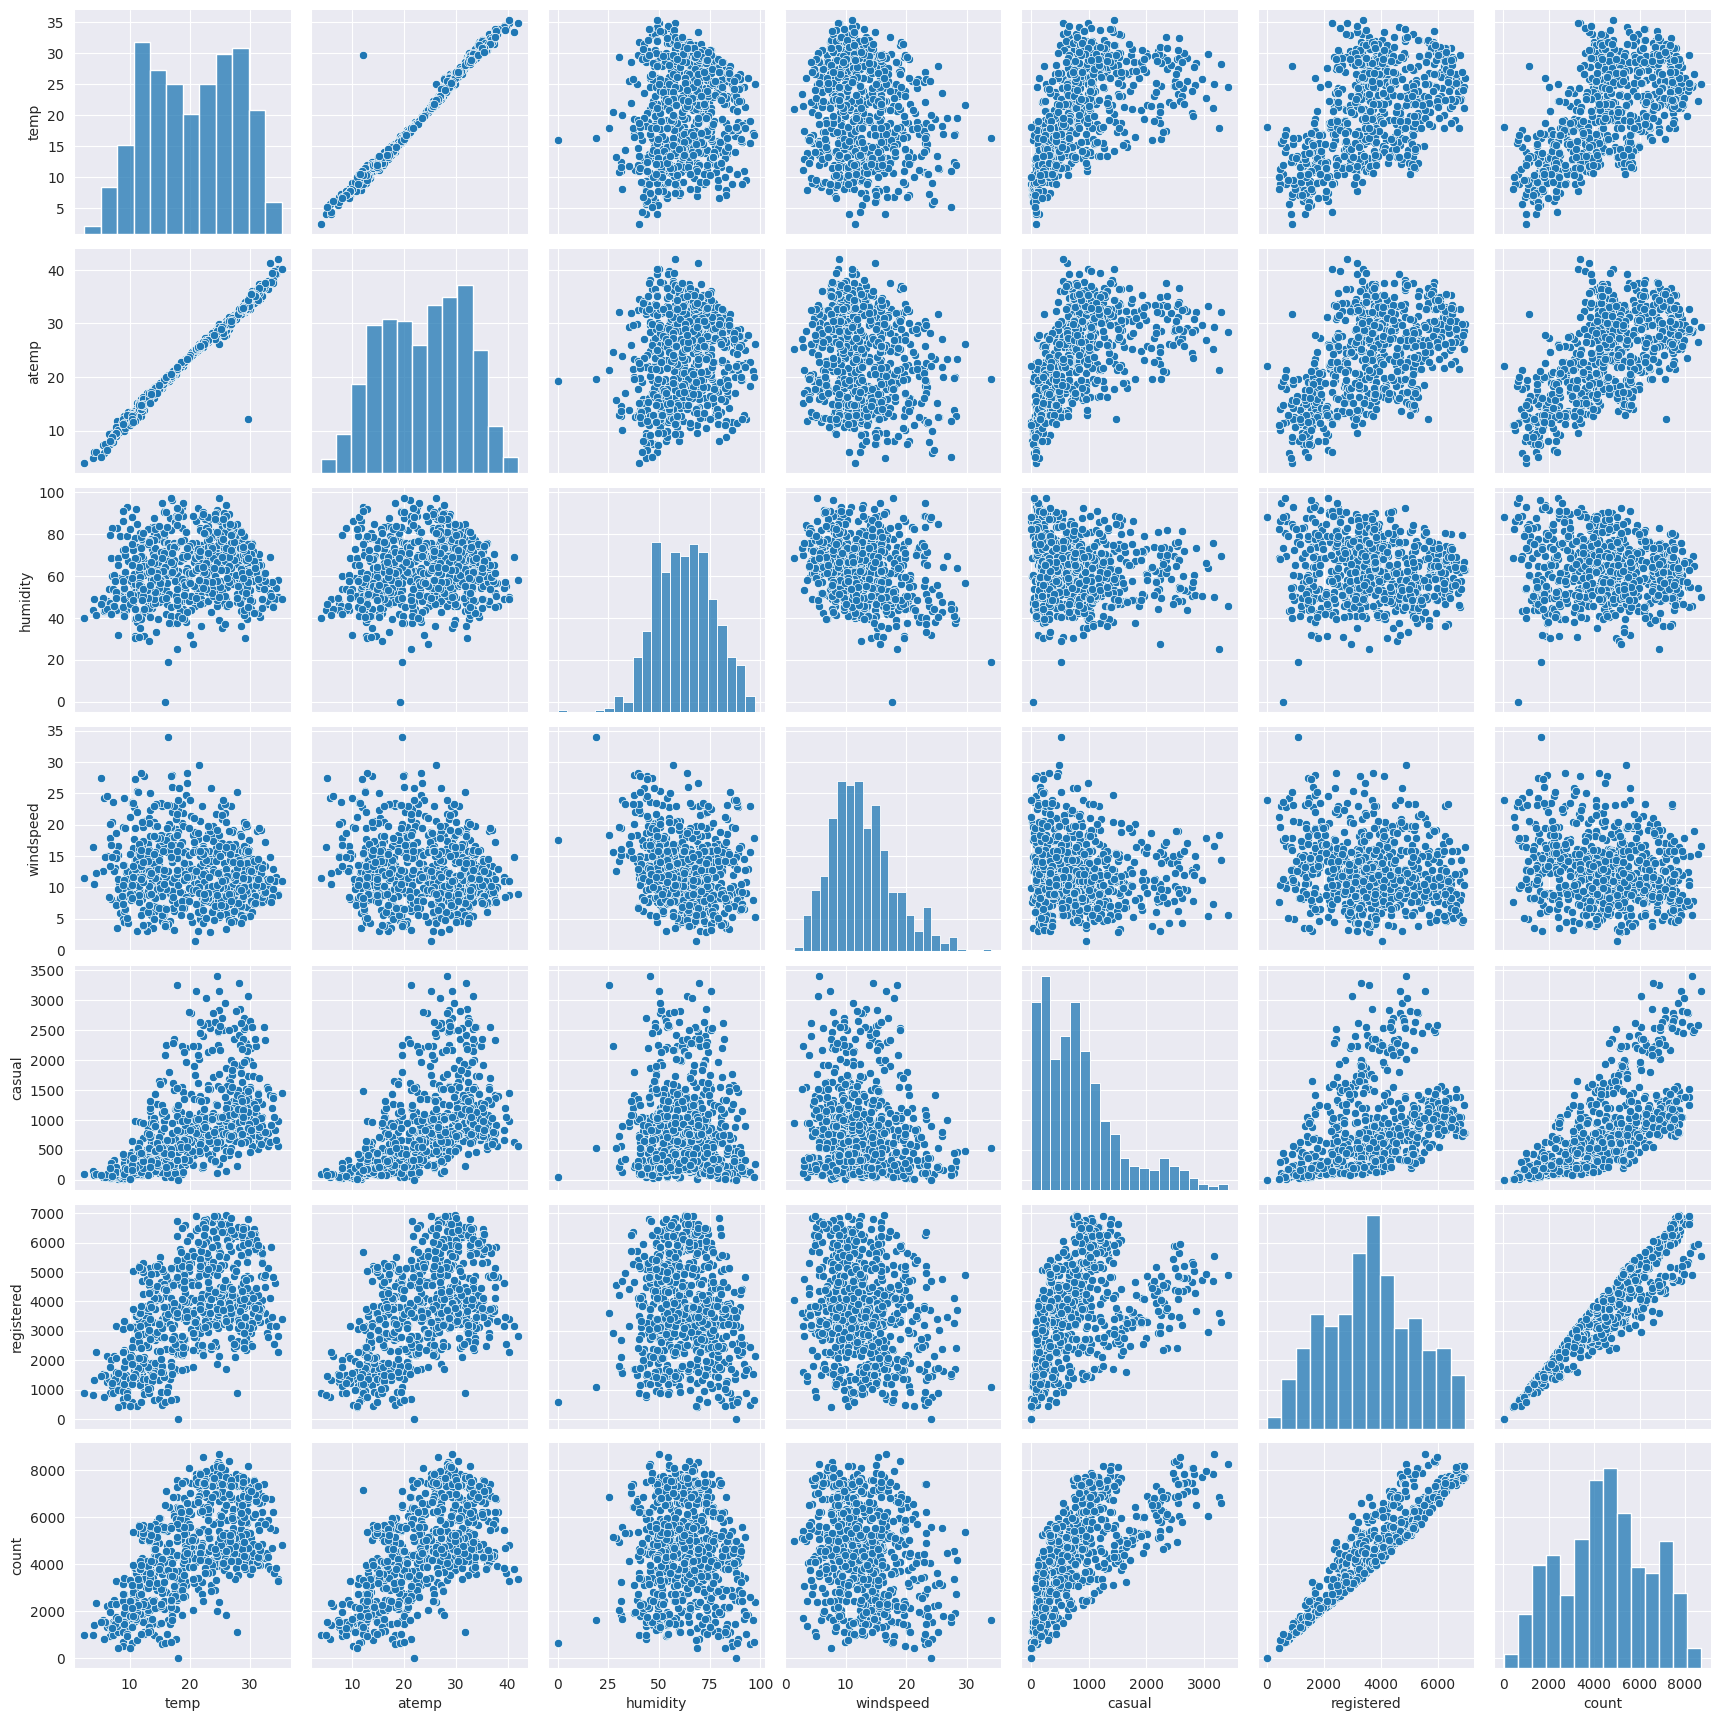

In [699]:
# Lets visualize and check correlation between the numeric variables

num_vars = day[["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]]
plt.figure()
sns.pairplot(num_vars)
plt.show()

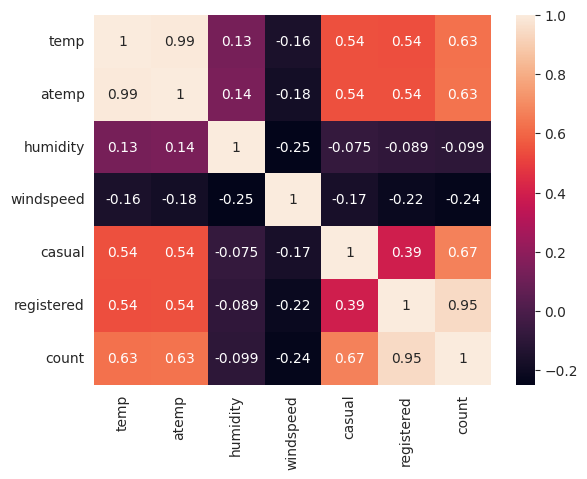

In [700]:
plt.figure()
sns.heatmap(num_vars.corr(), annot=True)
plt.show()

**We can see that temp and atemp has high correlation of about 0.99. They show almost linear relationship as in the pairplots above.**

**As we see there is high correletion between temp and atemp, better we need to drop one of them to avoid multicollinearity issue**

In [701]:
day.drop('atemp',axis=1,inplace=True)

**Also drop the instant,casual and registered columns as they are just numbers which are not contributing anything to the analysis.**

In [702]:
day.drop(['casual','registered'],axis=1,inplace=True)

============================================

**Data preprocessing before model building** 

In [703]:
day3 = day.copy()
day3.head()

,instant,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,month,year
0,1,Spring,Monday,1,Mist,14.110847,80.5833,10.749882,985,January,2018
1,2,Spring,Tuesday,1,Mist,14.902598,69.6087,16.652113,801,February,2018
2,3,Spring,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,March,2018
3,4,Spring,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,April,2018
4,5,Spring,Friday,1,Clear,9.305237,43.6957,12.522300,1600,May,2018


In [704]:
seasons = pd.get_dummies(day3['season'],drop_first=True)

weather= pd.get_dummies(day3['weathersit'],drop_first=True)

month= pd.get_dummies(day3['month'],drop_first=True)

week_day= pd.get_dummies(day3['weekday'],drop_first=True)

In [705]:
day2= pd.concat([day3,seasons,weather,month,week_day],axis=1)

In [706]:
# Dropping the categorical variables as they are already dummy-encoded.

day2.drop(['season','weathersit','weekday','month'],axis=1,inplace=True)

In [707]:
day2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   temp        730 non-null    float64
 3   humidity    730 non-null    float64
 4   windspeed   730 non-null    float64
 5   count       730 non-null    int64  
 6   year        730 non-null    int64  
 7   Summer      730 non-null    uint8  
 8   Fall        730 non-null    uint8  
 9   Winter      730 non-null    uint8  
 10  Mist        730 non-null    uint8  
 11  Light Snow  730 non-null    uint8  
 12  August      730 non-null    uint8  
 13  December    730 non-null    uint8  
 14  February    730 non-null    uint8  
 15  January     730 non-null    uint8  
 16  July        730 non-null    uint8  
 17  June        730 non-null    uint8  
 18  March       730 non-null    uint8  
 19  May         730 non-null    u

In [708]:
day2.head(1)

,instant,workingday,temp,humidity,windspeed,count,year,Summer,Fall,Winter,...,May,November,October,September,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,1,1,14.110847,80.5833,10.749882,985,2018,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [709]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

**Model Development**

**spliting Dataset in Dependent & Independent Variables**

In [710]:
y_col = 'count'
y = day2[y_col]
X = day2[day2.columns.drop(y_col)]

In [711]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [712]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (547, 28)
Shape of X_test:  (183, 28)
Shape of y_train:  (547,)
Shape of y_test (183,)


In [713]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 183 entries, 468 to 294
Series name: count
Non-Null Count  Dtype
--------------  -----
183 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [714]:
# Running RFE with the output number of the variable equal to 12

lm = LinearRegression()
lm.fit(X_train, y_train)

#rfe = RFE(lm,n_features_to_select = 12)
#rfe = rfe.fit(X_train, y_train)

LinearRegression()

In [715]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)
#X_train_rfe = sm.add_constant(X_train_rfe)

In [716]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [717]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     94.52
Date:                Sat, 06 May 2023   Prob (F-statistic):          1.41e-183
Time:                        12:58:45   Log-Likelihood:                -4422.1
No. Observations:                 547   AIC:                             8902.
Df Residuals:                     518   BIC:                             9027.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.628e+06   6.07e+05     -7.630      0.000   -5.82e+06   -3.44e+06
instant       -0.7303      0.800     -0.913      0.362      -2.301       0.841
workingday   579.8366    238.549      2.431      0.015     111.194    1048.480
temp         117.4940      8.983     13.080      0.000      99.847     135.141
humidity     -11.4685      3.404     -3.370      0.001     -18.155      -4.782
windspeed    -37.9179      7.723     -4.910      0.000     -53.090     -22.746
year        2294.2422    300.594      7.632      0.000    1703.709    2884.775
Summer      1232.8824    153.918      8.010      0.000     930.503    1535.262
Fall        1103.5016    216.617      5.094      0.000     677.946    1529.057
Winter      1776.5291    214.653      8.276      0.000    1354.832    2198.226
Mist        -497.4792     92.133     -5.400      0.000    -678.480    -316.478
Light Snow -1796.2369    230.098     -7.806      0.000   -2248.277   -1344.197
August      -144.9146    184.414     -0.786      0.432    -507.206     217.377
December    -210.9902    213.736     -0.987      0.324    -630.886     208.905
February    -158.0352    188.574     -0.838      0.402    -528.499     212.428
January     -213.3094    184.319     -1.157      0.248    -575.415     148.796
July        -372.9132    185.042     -2.015      0.044    -736.439      -9.388
June          26.0602    173.660      0.150      0.881    -315.105     367.225
March        239.7101    182.351      1.315      0.189    -118.528     597.948
May          -15.5357    172.617     -0.090      0.928    -354.651     323.580
November    -412.8037    186.599     -2.212      0.027    -779.387     -46.220
October      188.1807    181.706      1.036      0.301    -168.790     545.151
September    410.4086    181.497      2.261      0.024      53.848     766.970
Monday      -888.3039    273.933     -3.243      0.001   -1426.461    -350.147
Tuesday     -812.3592    265.503     -3.060      0.002   -1333.954    -290.764
Wednesday   -753.7381    249.165     -3.025      0.003   -1243.236    -264.240
Thursday    -581.2323    274.924     -2.114      0.035   -1121.335     -41.129
Friday      -621.0726    270.709     -2.294      0.022   -1152.895     -89.250
Saturday      -1.6582    132.447     -0.013      0.990    -261.858     258.542
==============================================================================
Omnibus:                       71.504   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.016
Skew:                          -0.783   Prob(JB):                     3.55e-29
Kurtosis:                       4.815   Cond. No.                     3.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [718]:
X_train_rfe.head(1)

,workingday,temp,humidity,windspeed,year,Summer,Fall,Winter,Light Snow,Monday
653,1,0.509887,0.574121,0.329497,2019,0,0,1,0,0


In [720]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lm3 = cross_val_score(estimator = LinearRegression(), X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lm3_train2 = lm.predict(X_train)
r2_score_lm3_train2 = r2_score(y_train, y_pred_lm3_train2)

X_test = sm.add_constant(X_test)
# Predicting R2 Score the Test set results
y_pred_lm3_test2 = lm.predict(X_test)
r2_score_lm3_test2 = r2_score(y_test, y_pred_lm3_test2)

# Predicting RMSE the Test set results
rmse_lm3 = (np.sqrt(mean_squared_error(y_test, y_pred_lm3_test2)))

In [721]:
print("CV: ", cv_lm3.mean())
print('R2_score (train): ', r2_score_lm3_train2)
print('R2_score (test): ', r2_score_lm3_test2)
print("RMSE: ", rmse_lm3)

CV:  0.8151200966244918
R2_score (train):  0.8363183952699978
R2_score (test):  0.8245333439280734
RMSE:  801.8072948108606


-------------------------------------------

In [722]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','humidity','windspeed','count']

day2[num_vars]= scaler.fit_transform(day2[num_vars])

In [723]:
y_col = 'count'
y = day2[y_col]
X = day2[day2.columns.drop(y_col)]

In [724]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [725]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (547, 28)
Shape of X_test:  (183, 28)
Shape of y_train:  (547,)
Shape of y_test (183,)


In [726]:
X_train.head(1)

,instant,workingday,temp,humidity,windspeed,year,Summer,Fall,Winter,Mist,...,May,November,October,September,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
653,654,1,0.509887,0.574121,0.329497,2019,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [727]:
# Running RFE with the output number of the variable equal to 12

lm1 = LinearRegression()
lm1.fit(X_train, y_train)


LinearRegression()

In [728]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)
#X_train_rfe = sm.add_constant(X_train_rfe)

In [729]:
lm1 = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [730]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     94.52
Date:                Sat, 06 May 2023   Prob (F-statistic):          1.41e-183
Time:                        13:00:25   Log-Likelihood:                 539.26
No. Observations:                 547   AIC:                            -1021.
Df Residuals:                     518   BIC:                            -895.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -532.4200     69.786     -7.629      0.000    -669.519    -395.321
instant    -8.402e-05    9.2e-05     -0.913      0.362      -0.000    9.67e-05
workingday     0.0667      0.027      2.431      0.015       0.013       0.121
temp           0.4448      0.034     13.080      0.000       0.378       0.512
humidity      -0.1283      0.038     -3.370      0.001      -0.203      -0.054
windspeed     -0.1418      0.029     -4.910      0.000      -0.199      -0.085
year           0.2639      0.035      7.632      0.000       0.196       0.332
Summer         0.1418      0.018      8.010      0.000       0.107       0.177
Fall           0.1270      0.025      5.094      0.000       0.078       0.176
Winter         0.2044      0.025      8.276      0.000       0.156       0.253
Mist          -0.0572      0.011     -5.400      0.000      -0.078      -0.036
Light Snow    -0.2067      0.026     -7.806      0.000      -0.259      -0.155
August        -0.0167      0.021     -0.786      0.432      -0.058       0.025
December      -0.0243      0.025     -0.987      0.324      -0.073       0.024
February      -0.0182      0.022     -0.838      0.402      -0.061       0.024
January       -0.0245      0.021     -1.157      0.248      -0.066       0.017
July          -0.0429      0.021     -2.015      0.044      -0.085      -0.001
June           0.0030      0.020      0.150      0.881      -0.036       0.042
March          0.0276      0.021      1.315      0.189      -0.014       0.069
May           -0.0018      0.020     -0.090      0.928      -0.041       0.037
November      -0.0475      0.021     -2.212      0.027      -0.090      -0.005
October        0.0216      0.021      1.036      0.301      -0.019       0.063
September      0.0472      0.021      2.261      0.024       0.006       0.088
Monday        -0.1022      0.032     -3.243      0.001      -0.164      -0.040
Tuesday       -0.0935      0.031     -3.060      0.002      -0.153      -0.033
Wednesday     -0.0867      0.029     -3.025      0.003      -0.143      -0.030
Thursday      -0.0669      0.032     -2.114      0.035      -0.129      -0.005
Friday        -0.0715      0.031     -2.294      0.022      -0.133      -0.010
Saturday      -0.0002      0.015     -0.013      0.990      -0.030       0.030
==============================================================================
Omnibus:                       71.504   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.016
Skew:                          -0.783   Prob(JB):                     3.55e-29
Kurtosis:                       4.815   Cond. No.                     3.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [731]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lm = cross_val_score(estimator = LinearRegression(), X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lm_train = lm1.predict(X_train)
r2_score_lm_train = r2_score(y_train, y_pred_lm_train)

X_test = sm.add_constant(X_test)
# Predicting R2 Score the Test set results
y_pred_lm_test = lm1.predict(X_test)
r2_score_lm_test = r2_score(y_test, y_pred_lm_test)

# Predicting RMSE the Test set results
rmse_lm = (np.sqrt(mean_squared_error(y_test, y_pred_lm_test)))

In [732]:
print("CV: ", cv_lm.mean())
print('R2_score (train): ', r2_score_lm_train)
print('R2_score (test): ', r2_score_lm_test)
print("RMSE: ", rmse_lm)

CV:  0.8151200966244664
R2_score (train):  0.8363183952699783
R2_score (test):  0.8245333439281238
RMSE:  0.09224658246787226


----------------------------------------------

In [733]:
# Running RFE with the output number of the variable equal to 12

lm2 = LinearRegression()
lm2.fit(X_train, y_train)

rfe = RFE(lm2,n_features_to_select = 12)
rfe = rfe.fit(X_train, y_train)

In [734]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('const', False, 18),
 ('instant', False, 17),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('Summer', True, 1),
 ('Fall', True, 1),
 ('Winter', True, 1),
 ('Mist', False, 5),
 ('Light Snow', True, 1),
 ('August', False, 12),
 ('December', False, 10),
 ('February', False, 13),
 ('January', False, 11),
 ('July', False, 9),
 ('June', False, 15),
 ('March', False, 7),
 ('May', False, 14),
 ('November', False, 8),
 ('October', False, 6),
 ('September', False, 4),
 ('Monday', True, 1),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1),
 ('Thursday', False, 3),
 ('Friday', False, 2),
 ('Saturday', False, 16)]

In [735]:
col = X_train.columns[rfe.support_]
col

Index(['workingday', 'temp', 'humidity', 'windspeed', 'year', 'Summer', 'Fall',
       'Winter', 'Light Snow', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [736]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_test1 = X_test[col]

In [737]:
X_train_rfe.head(1)

,workingday,temp,humidity,windspeed,year,Summer,Fall,Winter,Light Snow,Monday,Tuesday,Wednesday
653,1,0.509887,0.574121,0.329497,2019,0,0,1,0,0,0,1


In [738]:
lm2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [739]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              603.9
Date:                Sat, 06 May 2023   Prob (F-statistic):                   7.89e-302
Time:                        13:01:08   Log-Likelihood:                          266.69
No. Observations:                 547   AIC:                                     -509.4
Df Residuals:                     535   BIC:                                     -457.7
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
workingday     0.0032      0.016      0.196      0.845      -0.029       0.035
temp           0.5442      0.052     10.366      0.000       0.441       0.647
humidity      -0.3039      0.049     -6.255      0.000      -0.399      -0.208
windspeed     -0.1789      0.045     -3.940      0.000      -0.268      -0.090
year           0.0002    2.1e-05      9.352      0.000       0.000       0.000
Summer         0.1232      0.025      4.914      0.000       0.074       0.172
Fall           0.0815      0.032      2.514      0.012       0.018       0.145
Winter         0.1874      0.021      9.018      0.000       0.147       0.228
Light Snow    -0.2047      0.040     -5.158      0.000      -0.283      -0.127
Monday        -0.0323      0.021     -1.564      0.118      -0.073       0.008
Tuesday       -0.0256      0.020     -1.278      0.202      -0.065       0.014
Wednesday     -0.0283      0.020     -1.390      0.165      -0.068       0.012
==============================================================================
Omnibus:                       14.940   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.240
Skew:                           0.093   Prob(JB):                       0.0162
Kurtosis:                       2.428   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [740]:
# Predicting Cross Validation Score
cv_lm2 = cross_val_score(estimator = LinearRegression(), X = X_train_rfe, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lm2_train = lm2.predict(X_train_rfe)
r2_score_lm2_train = r2_score(y_train, y_pred_lm2_train)

#X_test = sm.add_constant(X_test)
# Predicting R2 Score the Test set results
y_pred_lm2_test = lm2.predict(X_test1)
r2_score_lm2_test = r2_score(y_test, y_pred_lm2_test)

# Predicting RMSE the Test set results
rmse_lm2 = (np.sqrt(mean_squared_error(y_test, y_pred_lm2_test)))

print("CV: ", cv_lm2.mean())
print('R2_score (train): ', r2_score_lm2_train)
print('R2_score (test): ', r2_score_lm2_test)
print("RMSE: ", rmse_lm2)

CV:  0.79980083255966
R2_score (train):  0.5565624554207513
R2_score (test):  0.5509179584810681
RMSE:  0.14757603229062627


In [741]:
X_train_rfe.drop(['Tuesday','Wednesday'],axis=1,inplace=True)
X_test1.drop(['Tuesday','Wednesday'],axis=1,inplace=True)

<ipython-input-741-146db1b1ae44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop(['Tuesday','Wednesday'],axis=1,inplace=True)


In [748]:

X_test1.head(1)

,workingday,temp,humidity,windspeed,year,Summer,Fall,Winter,Light Snow,Monday
468,0,0.543115,0.517138,0.347424,2019,1,0,0,0,0


In [749]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [750]:
lm4 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [751]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     225.3
Date:                Sat, 06 May 2023   Prob (F-statistic):          1.01e-184
Time:                        13:03:12   Log-Likelihood:                 495.39
No. Observations:                 547   AIC:                            -968.8
Df Residuals:                     536   BIC:                            -921.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -458.1422     17.228    -26.594      0.000    -491.984    -424.301
workingday    -0.0012      0.010     -0.121      0.904      -0.020       0.018
temp           0.4852      0.035     14.042      0.000       0.417       0.553
humidity      -0.2361      0.032     -7.374      0.000      -0.299      -0.173
windspeed     -0.1658      0.030     -5.564      0.000      -0.224      -0.107
year           0.2271      0.009     26.617      0.000       0.210       0.244
Summer         0.1422      0.017      8.621      0.000       0.110       0.175
Fall           0.1095      0.021      5.130      0.000       0.068       0.151
Winter         0.1898      0.014     13.891      0.000       0.163       0.217
Light Snow    -0.1635      0.026     -6.310      0.000      -0.214      -0.113
Monday        -0.0242      0.013     -1.931      0.054      -0.049       0.000
==============================================================================
Omnibus:                       66.112   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.914
Skew:                          -0.721   Prob(JB):                     7.50e-28
Kurtosis:                       4.844   Cond. No.                     8.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [754]:
# Predicting Cross Validation Score
cv_lm4 = cross_val_score(estimator = LinearRegression(), X = X_train_rfe, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lm4_train = lm4.predict(X_train_rfe)
r2_score_lm4_train = r2_score(y_train, y_pred_lm4_train)

X_test = sm.add_constant(X_test1)
# Predicting R2 Score the Test set results
y_pred_lm4_test = lm4.predict(X_test)
r2_score_lm4_test = r2_score(y_test, y_pred_lm4_test)

# Predicting RMSE the Test set results
rmse_lm4 = (np.sqrt(mean_squared_error(y_test, y_pred_lm4_test)))

print("CV: ", cv_lm4.mean())
print('R2_score (train): ', r2_score_lm4_train)
print('R2_score (test): ', r2_score_lm4_test)
print("RMSE: ", rmse_lm4)

CV:  0.7963848193100057
R2_score (train):  0.807836025235558
R2_score (test):  0.8233235424948234
RMSE:  0.09256404547324247


**Lasso Regression**

In [645]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Lasso(alpha=2.36, fit_intercept=True, tol = 0.0199, max_iter=2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', Lasso(alpha=2.36, max_iter=2000, tol=0.0199))])

In [646]:
# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  -0.028973606410313102
R2_score (train):  0.0
R2_score (test):  -0.007746975255014332
RMSE:  0.2210694533259844


------------------------------------------------------------------------------------------

**Ridge Regression**

In [643]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Ridge(alpha=1777, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', Ridge(alpha=1777))])

In [644]:
# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.7798100014558452
R2_score (train):  0.9483923258235035
R2_score (test):  0.8079738495539055
RMSE:  0.09650130213021109


------------------------------------

**Polynomial Regression - 2nd degree**

In [647]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [648]:
# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.8151200966244664
R2_score (train):  0.9614256928788038
R2_score (test):  -1056067.4139409198
RMSE:  226.3075340469189


------------------------------------------

**Decision Tree Regression**

In [653]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [654]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.7683235128944642
R2_score (train):  1.0
R2_score (test):  0.8154215489984825
RMSE:  0.09461140331425352


**Decision Tree Regression with RFE features**

In [655]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train_rfe, y_train)

DecisionTreeRegressor(random_state=0)

In [656]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train_rfe, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train_rfe)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test1)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.7291318322340191
R2_score (train):  1.0
R2_score (test):  0.7697398991621138
RMSE:  0.10567258487510091


**Random Forest Regression**

In [657]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 1200, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=1200, random_state=0)

In [658]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8667797597310359
R2_score (train):  0.9824738457772147
R2_score (test):  0.8991076455451338
RMSE:  0.06994909728165304


**Measuring the Error**

In [755]:
models = [('Linear Regression1', rmse_lm3, r2_score_lm3_train2, r2_score_lm3_test2, cv_lm3.mean()),
          ('Linear Regression2', rmse_lm, r2_score_lm_train, r2_score_lm_test, cv_lm.mean()),
          ('Linear Regression3', rmse_lm2, r2_score_lm2_train, r2_score_lm2_test, cv_lm2.mean()),
          ('Linear Regression4', rmse_lm4, r2_score_lm4_train, r2_score_lm4_test, cv_lm4.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [756]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict.head(10)

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression1,801.807295,0.836318,8.245333e-01,0.815120
1,Linear Regression2,0.092247,0.836318,8.245333e-01,0.815120
2,Linear Regression3,0.147576,0.807836,5.509180e-01,0.799801
3,Linear Regression4,0.092564,0.807836,8.233235e-01,0.796385
4,Polynomial Regression (2nd),226.307534,0.961426,-1.056067e+06,0.815120
5,Ridge Regression,0.096501,0.948392,8.079738e-01,0.779810
6,Lasso Regression,0.221069,0.000000,-7.746975e-03,-0.028974
7,Decision Tree Regression,0.105673,1.000000,7.697399e-01,0.729132
8,Random Forest Regression,0.069949,0.982474,8.991076e-01,0.866780


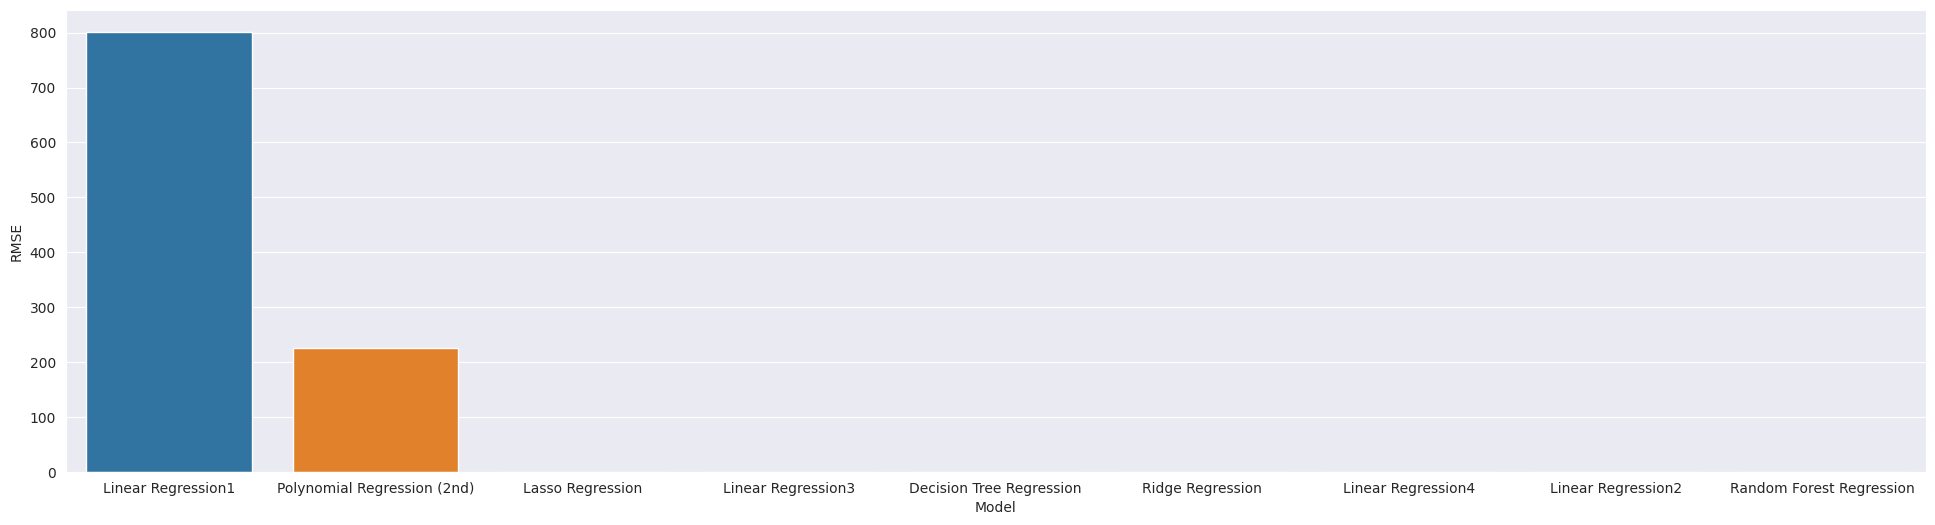

In [759]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=10)
axe.set_ylabel('RMSE', size=10)

plt.show()

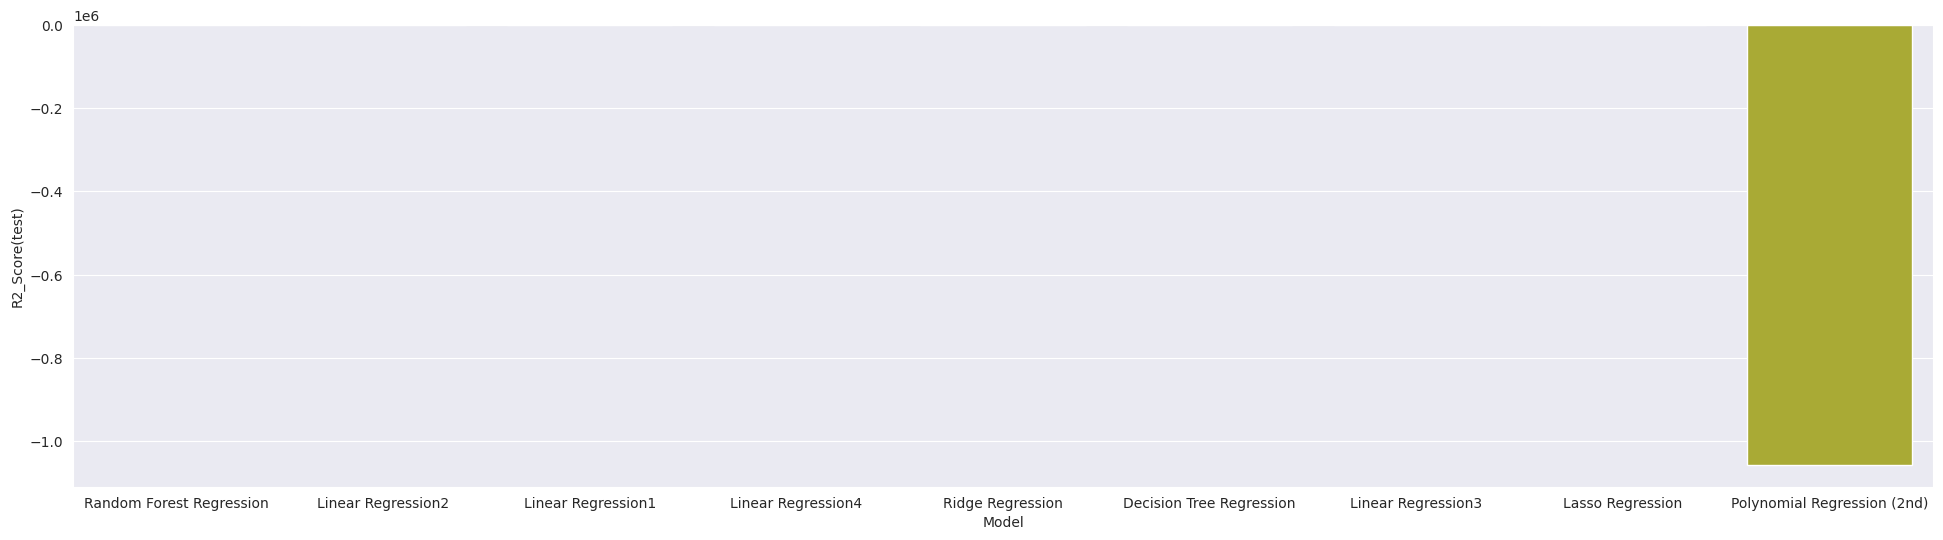

In [764]:
predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,6))
sns.barplot(x='Model', y='R2_Score(test)', data=predict, ax = axe)
axe.set_xlabel('Model', size=10)
axe.set_ylabel('R2_Score(test)', size=10)

plt.show()

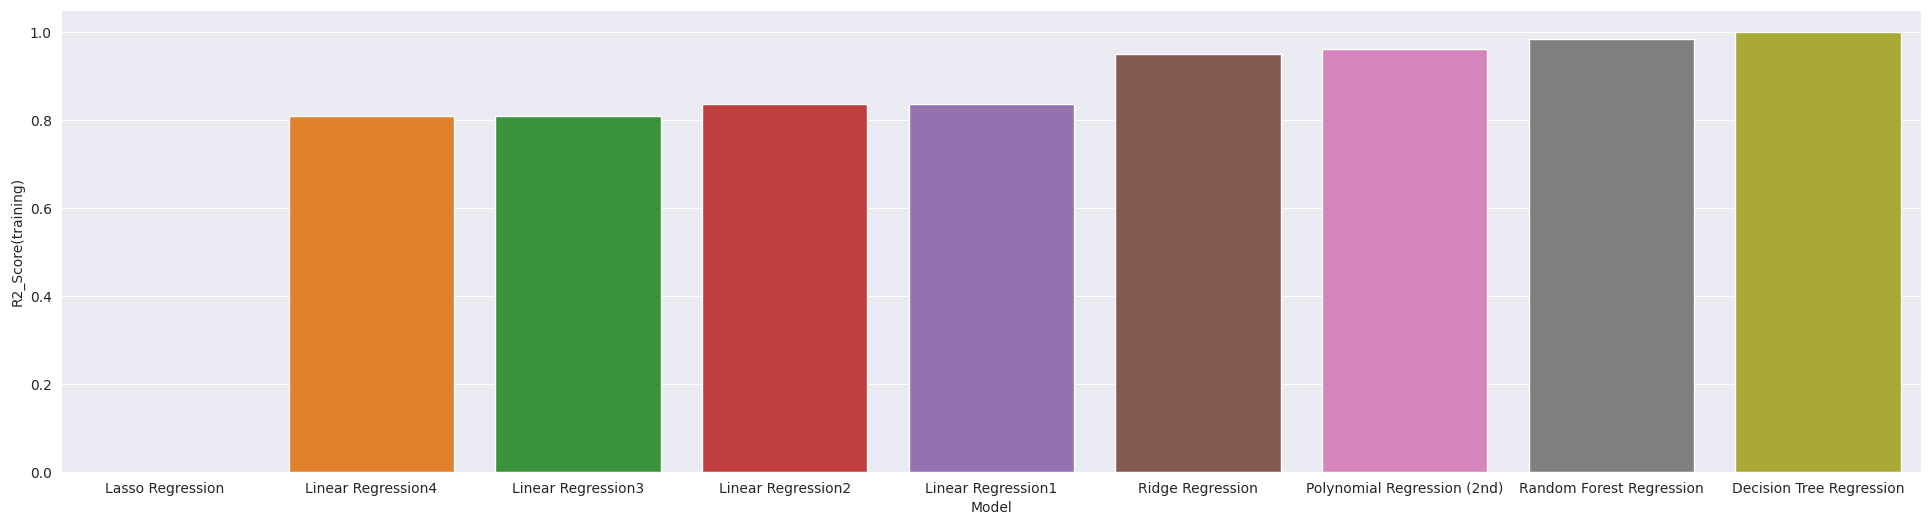

In [762]:
predict.sort_values(by=['R2_Score(training)'], ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,6))
sns.barplot(x='Model', y='R2_Score(training)', data=predict, ax = axe)
axe.set_xlabel('Model', size=10)
axe.set_ylabel('R2_Score(training)', size=10)

plt.show()